# Perceptron Multicapa Multivariado en el Tiempo
## Caso de Estudio: Serie de entradas como MLP Independiente - MLP de entrada de múltiples cabezas
### MLP MULTIVARIATE TIME SERIES FORECASTING - MLP Independent Input Series

Alternativa mas elaborada del modelo MLP, donde se maneja MLP separado y la salida de cada uno de estos submodelos se puede combinar antes de hacer una predicción para la secuencia de salida



![Texto alternativo](https://3qeqpr26caki16dnhd19sv6by6v-wpengine.netdna-ssl.com/wp-content/uploads/2018/08/Plot-of-Multi-Headed-MLP-for-Multivariate-Time-Series-Forecasting.png)

## Librerias Necesarias

In [16]:
from numpy import array
from numpy import hstack
from keras.models import Model
from keras.layers import Input
from keras.layers import Dense
from keras.layers.merge import concatenate
from pandas import DataFrame, concat, read_csv

## Funciones definidas para simplificar el codigo, ya que muchas cosas se pueden reutilizar

In [17]:
""" 
Input:
    figx = Pixeles x
    figy= Pixeles y
    historyXYZ = history del modelo a graficar
    strEvaluacion= tipo de grafica, para definir titulo, subitutlos, etc
    mostrar= booleano para graficar o no
    nombreArchivo=archivo con el cual se guardara el grafico
Output:
    None, muestra la grafica en Matplotlib
Grafica los datos de history de un modelo, ya sea el accucary test vs train o el loss. 
"""
def graficaUnitaria(fix:16,fiy:8,historyXYZ,strEvaluacion,mostrar,nombreArchivo):
    figure(figsize=(fix,fiy))
    pyplot.grid(True)
    if(strEvaluacion=='accuracy'):
        pyplot.title("ACCURACY vs VAL_ACCURACY")
        pyplot.plot(historyXYZ.history['acc'], label='Train ACC')
        pyplot.legend()
        pyplot.plot(historyXYZ.history['val_acc'], label='Test VAL_aCC')
        pyplot.legend()
        #pyplot.savefig(nombreArchivo, dpi=300)
        if(mostrar):
            pyplot.show()
    else:
        pyplot.title("LOSS vs VAL_LOSS")
        pyplot.plot(historyXYZ.history['loss'], label='Train LOSS')
        pyplot.plot(historyXYZ.history['val_loss'], label='Test VAL_LOSS')
        pyplot.legend()
        #pyplot.savefig(nombreArchivo, dpi=300)
        if(mostrar):
            pyplot.show()
""" 
Input:
    [10,20,30,40,50...]
Output:
    [10 20 30] 40
    [20 30 40] 50
    [30 40 50] 60
    [40 50 60] 70
    [50 60 70] 80
    [60 70 80] 90
Divide una secuencia multivariada dada en varias muestras donde cada muestra 
tiene un número específico de pasos de tiempo y la salida es un solo paso de tiempo
"""
def split_sequences(sequences, n_steps):
    X, y = list(), list()
    for i in range(len(sequences)):
        end_ix = i + n_steps
        if end_ix > len(sequences):
            break
        seq_x, seq_y = sequences[i:end_ix, :-1], sequences[end_ix-1, -1]
        X.append(seq_x)
        y.append(seq_y)
    return array(X), array(y)
"""
Input: 
    listoflist=Lista de Listas  
    valoresPredecir=Lista vacia en la cual se guardara los valores
Output: 
    valoresPredecir=Lista con los valores almacenados
Pasa de un lista de listas a solo una lista
"""
def reemovNestings(valoresPredecir,listoflist): 
    for i in listoflist: 
        if type(i) == list: 
            reemovNestings(i) 
        else: 
            valoresPredecir.append(i) 
    return valoresPredecir

## Lectura de Archivo de Datos CSV y preprocesamiento de los datos
#### Obtengo valores de cada columna y las proceso como listas

In [18]:
dataset1 = read_csv('aucorpTrain.csv', header=0, index_col=0)
dato1=dataset1.iloc[:,2]
values1 = dato1.values
val1=values1.tolist()
valores1 = [] 
listVal1=reemovNestings(valores1,val1) 

dato2=dataset1.iloc[:,3]
values2 = dato2.values
val2=values2.tolist()
valores2 = [] 
listVal2=reemovNestings(valores2,val2) 

dato3=dataset1.iloc[:,4]
values3 = dato3.values
val3=values3.tolist()
valores3 = [] 
listVal3=reemovNestings(valores3,val3) 

dato4=dataset1.iloc[:,5]
values4 = dato4.values
val4=values4.tolist()
valores4 = [] 
listVal4=reemovNestings(valores4,val4) 

dato5=dataset1.iloc[:,6]
values5 = dato5.values
val5=values5.tolist()
valores5 = [] 
listVal5=reemovNestings(valores5,val5) 

dato6=dataset1.iloc[:,7]
values6 = dato6.values
val6=values6.tolist()
valores6 = [] 
listVal6=reemovNestings(valores6,val6) 

dato7=dataset1.iloc[:,8]
values7 = dato7.values
val7=values7.tolist()
valores7 = [] 
listVal7=reemovNestings(valores7,val7) 

dato8=dataset1.iloc[:,9]
values8 = dato8.values
val8=values8.tolist()
valores8 = [] 
listVal8=reemovNestings(valores8,val8) 

dato9=dataset1.iloc[:,10]
values9 = dato9.values
val9=values9.tolist()
valores9 = [] 
listVal9=reemovNestings(valores9,val9) 

dato10=dataset1.iloc[:,11]
values10 = dato10.values
val10=values10.tolist()
valores10 = [] 
listVal10=reemovNestings(valores10,val10) 

dato11=dataset1.iloc[:,12]
values11 = dato11.values
val11=values11.tolist()
valores11 = [] 
listVal11=reemovNestings(valores11,val11) 

dato12=dataset1.iloc[:,13]
values12 = dato12.values
val12=values12.tolist()
valores12 = [] 
listVal12=reemovNestings(valores12,val12) 

datoSalida=dataset1.iloc[:,1]
valuesSalida = datoSalida.values
valSalida=valuesSalida.tolist()
valoresSalida = [] 
salida=reemovNestings(valoresSalida,valSalida) 


#### Elaboro una lista de listas el cual me servira para el manejo de data en el train y test

In [19]:
in_seq1 = array(listVal12)
in_seq2 = array(listVal2)
in_seq3 = array(listVal3)
in_seq4 = array(listVal4)
in_seq5 = array(listVal5)
in_seq6 = array(listVal6)
in_seq7 = array(listVal7)
in_seq8 = array(listVal8)
in_seq9 = array(listVal9)
in_seq10 = array(listVal10)
in_seq11 = array(listVal11)
in_seq12 = array(listVal12)
out_seq = array(salida)

in_seq1 = in_seq1.reshape((len(in_seq1), 1))
in_seq2 = in_seq2.reshape((len(in_seq2), 1))
in_seq3 = in_seq3.reshape((len(in_seq3), 1))
in_seq4 = in_seq4.reshape((len(in_seq4), 1))
in_seq5 = in_seq5.reshape((len(in_seq5), 1))
in_seq6 = in_seq6.reshape((len(in_seq6), 1))
in_seq7 = in_seq7.reshape((len(in_seq7), 1))
in_seq8 = in_seq8.reshape((len(in_seq8), 1))
in_seq9 = in_seq9.reshape((len(in_seq9), 1))
in_seq10 = in_seq10.reshape((len(in_seq10), 1))
in_seq11 = in_seq11.reshape((len(in_seq11), 1))
in_seq12 = in_seq12.reshape((len(in_seq12), 1))
out_seq = out_seq.reshape((len(out_seq), 1))

dataset = hstack((in_seq1, in_seq2,in_seq3,in_seq4,in_seq5, in_seq6,in_seq7,in_seq8,in_seq9, in_seq10,in_seq11,in_seq12, out_seq))
print(dataset)
n_steps = 3
X, y = split_sequences(dataset, n_steps)
print(X)


[[ 7.42000000e+02  5.70000000e-01  6.87084156e+06 ...  1.38000000e+03
   7.42000000e+02  2.01430000e+04]
 [ 7.96000000e+02  7.80000000e-01  6.87084156e+06 ...  1.23000000e+03
   7.96000000e+02  1.42190000e+04]
 [ 8.65000000e+02  9.00000000e-01  6.87084156e+06 ...  1.19300000e+03
   8.65000000e+02  1.58090000e+04]
 ...
 [ 1.12700000e+00 -5.00000000e-02  8.02712976e+06 ...  8.41000000e+02
   1.12700000e+00  1.82210000e+04]
 [ 1.03700000e+00 -2.50000000e-01  8.02712976e+06 ...  6.29000000e+02
   1.03700000e+00  1.58460000e+04]
 [ 1.12900000e+00  1.00000000e-01  8.02712976e+06 ...  5.76000000e+02
   1.12900000e+00  1.97200000e+04]]
[[[ 7.42000000e+02  5.70000000e-01  6.87084156e+06 ...  5.84000000e+01
    1.38000000e+03  7.42000000e+02]
  [ 7.96000000e+02  7.80000000e-01  6.87084156e+06 ...  5.86800000e+01
    1.23000000e+03  7.96000000e+02]
  [ 8.65000000e+02  9.00000000e-01  6.87084156e+06 ...  5.84900000e+01
    1.19300000e+03  8.65000000e+02]]

 [[ 7.96000000e+02  7.80000000e-01  6.870

## Entrenamiento de Modelo
### Funcion de Activacion RELU, Medida de Perdida/Error MSE, metrica Accuracy, Numero de Neuronas 100 - 1

In [20]:
X1 = X[:, :, 0]
X2 = X[:, :, 1]
X3 = X[:, :, 2]
X4 = X[:, :, 3]
X5 = X[:, :, 4]
X6 = X[:, :, 5]
X7 = X[:, :, 6]
X8 = X[:, :, 7]
X9 = X[:, :, 8]
X10 = X[:, :, 9]
X11 = X[:, :, 10]
X12 = X[:, :, 11]

visible1 = Input(shape=(n_steps,))
dense1 = Dense(100, activation='relu')(visible1)

visible2 = Input(shape=(n_steps,))
dense2 = Dense(100, activation='relu')(visible2)

visible3 = Input(shape=(n_steps,))
dense3 = Dense(100, activation='relu')(visible3)

visible4 = Input(shape=(n_steps,))
dense4 = Dense(100, activation='relu')(visible4)

visible5 = Input(shape=(n_steps,))
dense5 = Dense(100, activation='relu')(visible5)

visible6 = Input(shape=(n_steps,))
dense6 = Dense(100, activation='relu')(visible6)

visible7 = Input(shape=(n_steps,))
dense7 = Dense(100, activation='relu')(visible7)

visible8 = Input(shape=(n_steps,))
dense8 = Dense(100, activation='relu')(visible8)

visible9 = Input(shape=(n_steps,))
dense9 = Dense(100, activation='relu')(visible9)

visible10 = Input(shape=(n_steps,))
dense10 = Dense(100, activation='relu')(visible10)

visible11 = Input(shape=(n_steps,))
dense11 = Dense(100, activation='relu')(visible11)

visible12 = Input(shape=(n_steps,))
dense12 = Dense(100, activation='relu')(visible12)

## Mezcla de redes reuronales independientes

In [21]:
merge = concatenate([dense1, dense2,dense3, dense4,dense5, dense6,dense7, dense8,dense9, dense10,dense11, dense12])

output = Dense(1)(merge)
model = Model(inputs=[visible1, visible2,visible3, visible4,visible5, visible6,visible7, visible8,visible9, visible10,visible11, visible12], outputs=output)

In [22]:
model.compile(optimizer='adam', loss='mse', metrics=['accuracy'])
historyC1=model.fit([X1, X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12], y, epochs=2000, verbose=0,validation_split=0.33,nb_epoch=200, batch_size=5)
model.summary()
model.save("modeloMultivariadoMLPI1001.h5")
print("Modelo Guardado Exitosamente")

C:\Users\Usuario\Anaconda3\envs\prediccionventas\lib\site-packages\ipykernel_launcher.py:2: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


Model: "model_10"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_109 (InputLayer)          (None, 3)            0                                            
__________________________________________________________________________________________________
input_110 (InputLayer)          (None, 3)            0                                            
__________________________________________________________________________________________________
input_111 (InputLayer)          (None, 3)            0                                            
__________________________________________________________________________________________________
input_112 (InputLayer)          (None, 3)            0                                            
___________________________________________________________________________________________

## Grafica Evalucion Resultados

Populating the interactive namespace from numpy and matplotlib


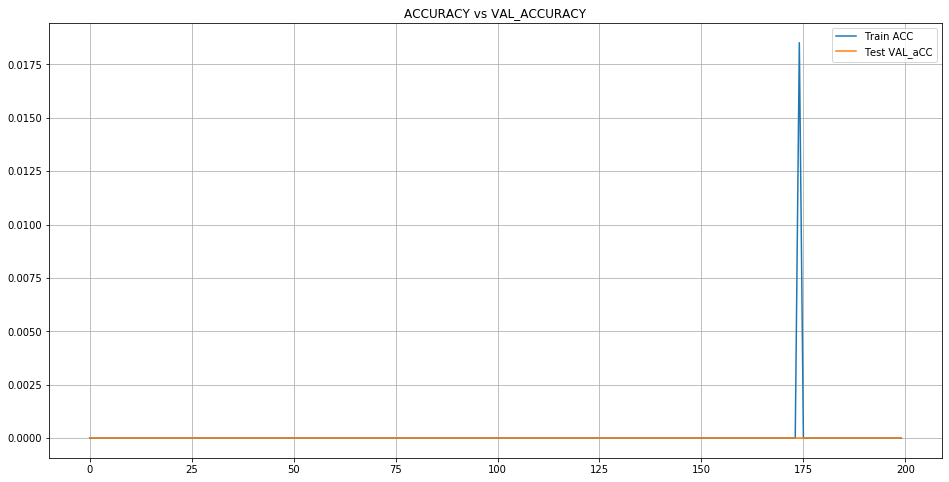

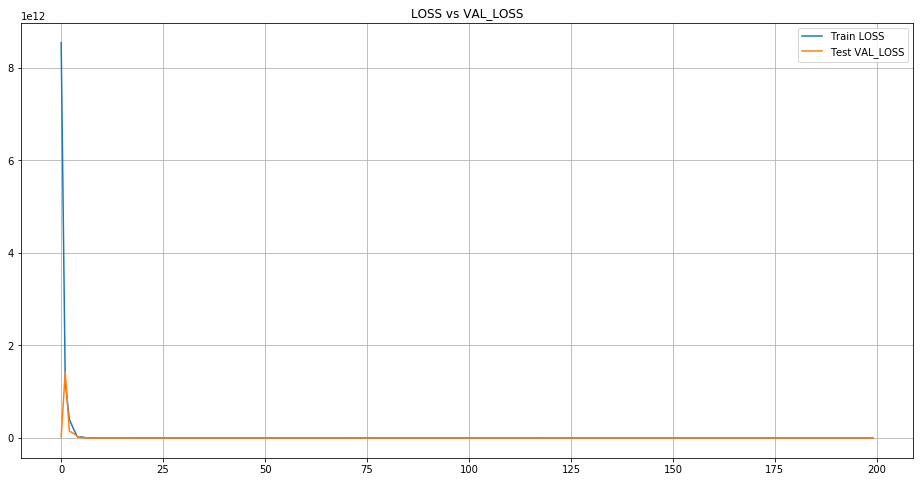

In [23]:
%pylab inline
graficaUnitaria(16,8,historyC1,'accuracy',True,'c1Acc.png')
graficaUnitaria(16,8,historyC1,'loss',True,'c1Loss.png')

# Codigo Completo

# Caso Base 100 Neuronas Ingreso

C:\Users\Usuario\Anaconda3\envs\prediccionventas\lib\site-packages\ipykernel_launcher.py:244: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.




					Resultado de Modelo Entrenado


Model: "model_21"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_241 (InputLayer)          (None, 3)            0                                            
__________________________________________________________________________________________________
input_242 (InputLayer)          (None, 3)            0                                            
__________________________________________________________________________________________________
input_243 (InputLayer)          (None, 3)            0                                            
__________________________________________________________________________________________________
input_244 (InputLayer)          (None, 3)            0                                            
____________________________________________________

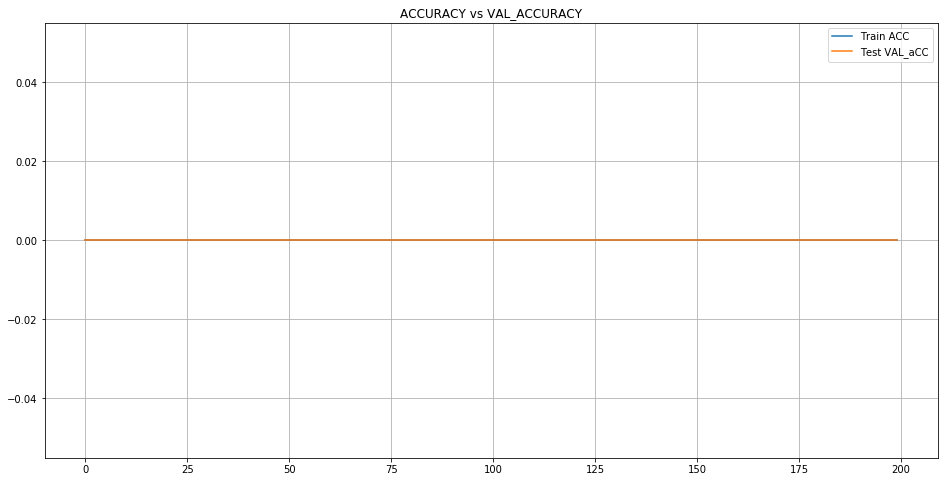

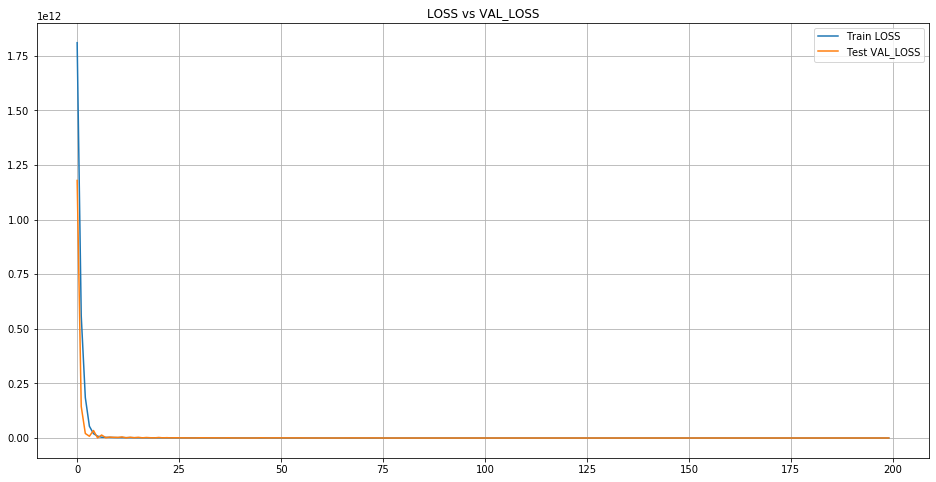



					Valores Input para Prediccion

 [[7.27000000e+02 5.70000000e-01 6.87084156e+06 2.12157500e+06
  2.16229370e+07 9.61300000e+01 9.98100000e+01 1.04879376e+06
  2.02545000e+03 5.84000000e+01 1.38000000e+03 7.42000000e+02]
 [9.20000000e+02 7.80000000e-01 6.87084156e+06 2.02545500e+06
  2.16229370e+07 2.39800000e+02 1.00090000e+02 1.17141944e+06
  1.78566000e+03 5.86800000e+01 1.23000000e+03 7.96000000e+02]
 [9.06000000e+02 9.00000000e-01 6.87084156e+06 2.05838600e+06
  2.16229370e+07 1.07000000e+02 9.76600000e+01 1.16525424e+06
  1.95057000e+03 5.84900000e+01 1.19300000e+03 8.65000000e+02]]


					Valores Output - Prediccion

 [[9260.223]]


In [35]:
from numpy import array
from numpy import hstack
from keras.models import Model
from keras.layers import Input
from keras.layers import Dense
from keras.layers.merge import concatenate
from pandas import DataFrame, concat, read_csv
""" 
Input:
    figx = Pixeles x
    figy= Pixeles y
    historyXYZ = history del modelo a graficar
    strEvaluacion= tipo de grafica, para definir titulo, subitutlos, etc
    mostrar= booleano para graficar o no
    nombreArchivo=archivo con el cual se guardara el grafico
Output:
    None, muestra la grafica en Matplotlib
Grafica los datos de history de un modelo, ya sea el accucary test vs train o el loss. 
"""
def graficaUnitaria(fix:16,fiy:8,historyXYZ,strEvaluacion,mostrar,nombreArchivo):
    figure(figsize=(fix,fiy))
    pyplot.grid(True)
    if(strEvaluacion=='accuracy'):
        pyplot.title("ACCURACY vs VAL_ACCURACY")
        pyplot.plot(historyXYZ.history['acc'], label='Train ACC')
        pyplot.legend()
        pyplot.plot(historyXYZ.history['val_acc'], label='Test VAL_aCC')
        pyplot.legend()
        pyplot.savefig(nombreArchivo, dpi=300)
        if(mostrar):
            pyplot.show()
    else:
        pyplot.title("LOSS vs VAL_LOSS")
        pyplot.plot(historyXYZ.history['loss'], label='Train LOSS')
        pyplot.plot(historyXYZ.history['val_loss'], label='Test VAL_LOSS')
        pyplot.legend()
        pyplot.savefig(nombreArchivo, dpi=300)
        if(mostrar):
            pyplot.show()
""" 
Input:
    [10,20,30,40,50...]
Output:
    [10 20 30] 40
    [20 30 40] 50
    [30 40 50] 60
    [40 50 60] 70
    [50 60 70] 80
    [60 70 80] 90
Divide una secuencia multivariada dada en varias muestras donde cada muestra 
tiene un número específico de pasos de tiempo y la salida es un solo paso de tiempo
"""
def split_sequences(sequences, n_steps):
    X, y = list(), list()
    for i in range(len(sequences)):
        end_ix = i + n_steps
        if end_ix > len(sequences):
            break
        seq_x, seq_y = sequences[i:end_ix, :-1], sequences[end_ix-1, -1]
        X.append(seq_x)
        y.append(seq_y)
    return array(X), array(y)
"""
Input: 
    listoflist=Lista de Listas  
    valoresPredecir=Lista vacia en la cual se guardara los valores
Output: 
    valoresPredecir=Lista con los valores almacenados
Pasa de un lista de listas a solo una lista
"""
def reemovNestings(valoresPredecir,listoflist): 
    for i in listoflist: 
        if type(i) == list: 
            reemovNestings(i) 
        else: 
            valoresPredecir.append(i) 
    return valoresPredecir

dataset1 = read_csv('aucorpTrain.csv', header=0, index_col=0)
dato1=dataset1.iloc[:,2]
values1 = dato1.values
val1=values1.tolist()
valores1 = [] 
listVal1=reemovNestings(valores1,val1) 

dato2=dataset1.iloc[:,3]
values2 = dato2.values
val2=values2.tolist()
valores2 = [] 
listVal2=reemovNestings(valores2,val2) 

dato3=dataset1.iloc[:,4]
values3 = dato3.values
val3=values3.tolist()
valores3 = [] 
listVal3=reemovNestings(valores3,val3) 

dato4=dataset1.iloc[:,5]
values4 = dato4.values
val4=values4.tolist()
valores4 = [] 
listVal4=reemovNestings(valores4,val4) 

dato5=dataset1.iloc[:,6]
values5 = dato5.values
val5=values5.tolist()
valores5 = [] 
listVal5=reemovNestings(valores5,val5) 

dato6=dataset1.iloc[:,7]
values6 = dato6.values
val6=values6.tolist()
valores6 = [] 
listVal6=reemovNestings(valores6,val6) 

dato7=dataset1.iloc[:,8]
values7 = dato7.values
val7=values7.tolist()
valores7 = [] 
listVal7=reemovNestings(valores7,val7) 

dato8=dataset1.iloc[:,9]
values8 = dato8.values
val8=values8.tolist()
valores8 = [] 
listVal8=reemovNestings(valores8,val8) 

dato9=dataset1.iloc[:,10]
values9 = dato9.values
val9=values9.tolist()
valores9 = [] 
listVal9=reemovNestings(valores9,val9) 

dato10=dataset1.iloc[:,11]
values10 = dato10.values
val10=values10.tolist()
valores10 = [] 
listVal10=reemovNestings(valores10,val10) 

dato11=dataset1.iloc[:,12]
values11 = dato11.values
val11=values11.tolist()
valores11 = [] 
listVal11=reemovNestings(valores11,val11) 

dato12=dataset1.iloc[:,13]
values12 = dato12.values
val12=values12.tolist()
valores12 = [] 
listVal12=reemovNestings(valores12,val12) 

datoSalida=dataset1.iloc[:,1]
valuesSalida = datoSalida.values
valSalida=valuesSalida.tolist()
valoresSalida = [] 
salida=reemovNestings(valoresSalida,valSalida) 

in_seq1 = array(listVal12)
in_seq2 = array(listVal2)
in_seq3 = array(listVal3)
in_seq4 = array(listVal4)
in_seq5 = array(listVal5)
in_seq6 = array(listVal6)
in_seq7 = array(listVal7)
in_seq8 = array(listVal8)
in_seq9 = array(listVal9)
in_seq10 = array(listVal10)
in_seq11 = array(listVal11)
in_seq12 = array(listVal12)
out_seq = array(salida)

in_seq1 = in_seq1.reshape((len(in_seq1), 1))
in_seq2 = in_seq2.reshape((len(in_seq2), 1))
in_seq3 = in_seq3.reshape((len(in_seq3), 1))
in_seq4 = in_seq4.reshape((len(in_seq4), 1))
in_seq5 = in_seq5.reshape((len(in_seq5), 1))
in_seq6 = in_seq6.reshape((len(in_seq6), 1))
in_seq7 = in_seq7.reshape((len(in_seq7), 1))
in_seq8 = in_seq8.reshape((len(in_seq8), 1))
in_seq9 = in_seq9.reshape((len(in_seq9), 1))
in_seq10 = in_seq10.reshape((len(in_seq10), 1))
in_seq11 = in_seq11.reshape((len(in_seq11), 1))
in_seq12 = in_seq12.reshape((len(in_seq12), 1))
out_seq = out_seq.reshape((len(out_seq), 1))

dataset = hstack((in_seq1, in_seq2,in_seq3,in_seq4,in_seq5, in_seq6,in_seq7,in_seq8,in_seq9, in_seq10,in_seq11,in_seq12, out_seq))
n_steps = 3
X, y = split_sequences(dataset, n_steps)
X1 = X[:, :, 0]
X2 = X[:, :, 1]
X3 = X[:, :, 2]
X4 = X[:, :, 3]
X5 = X[:, :, 4]
X6 = X[:, :, 5]
X7 = X[:, :, 6]
X8 = X[:, :, 7]
X9 = X[:, :, 8]
X10 = X[:, :, 9]
X11 = X[:, :, 10]
X12 = X[:, :, 11]

visible1 = Input(shape=(n_steps,))
dense1 = Dense(100, activation='relu')(visible1)

visible2 = Input(shape=(n_steps,))
dense2 = Dense(100, activation='relu')(visible2)

visible3 = Input(shape=(n_steps,))
dense3 = Dense(100, activation='relu')(visible3)

visible4 = Input(shape=(n_steps,))
dense4 = Dense(100, activation='relu')(visible4)

visible5 = Input(shape=(n_steps,))
dense5 = Dense(100, activation='relu')(visible5)

visible6 = Input(shape=(n_steps,))
dense6 = Dense(100, activation='relu')(visible6)

visible7 = Input(shape=(n_steps,))
dense7 = Dense(100, activation='relu')(visible7)

visible8 = Input(shape=(n_steps,))
dense8 = Dense(100, activation='relu')(visible8)

visible9 = Input(shape=(n_steps,))
dense9 = Dense(100, activation='relu')(visible9)

visible10 = Input(shape=(n_steps,))
dense10 = Dense(100, activation='relu')(visible10)

visible11 = Input(shape=(n_steps,))
dense11 = Dense(100, activation='relu')(visible11)

visible12 = Input(shape=(n_steps,))
dense12 = Dense(100, activation='relu')(visible12)

merge = concatenate([dense1, dense2,dense3, dense4,dense5, dense6,dense7, dense8,dense9, dense10,dense11, dense12])

output = Dense(1)(merge)
model = Model(inputs=[visible1, visible2,visible3, visible4,visible5, visible6,visible7, visible8,visible9, visible10,visible11, visible12], outputs=output)

model.compile(optimizer='adam', loss='mse', metrics=['accuracy'])
historyC1=model.fit([X1, X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12], y, epochs=2000, verbose=0,validation_split=0.33,nb_epoch=200, batch_size=5)
print('\n\n\t\t\t\t\tResultado de Modelo Entrenado\n\n')
model.summary()
model.save("modeloMultivariadoMLPI200100.h5")
print("Modelo Guardado Exitosamente")

%pylab inline
graficaUnitaria(16,8,historyC1,'accuracy',True,'modeloMultivariadoMLPI200100c1Acc.png')
graficaUnitaria(16,8,historyC1,'loss',True,'modeloMultivariadoMLPI200100c1Loss.png')


##PREDICCION

x_input = array([[727,0.57,6870841.555393,2121575,21622937,96.13,99.81,1048793.76,2025.45,58.40,1380,742],
  [920,0.78,6870841.555393,2025455,21622937,239.80,100.09,1171419.44,1785.66,58.68,1230,796],
  [906,0.90,6870841.555393,2058386,21622937,107.00,97.66,1165254.24,1950.57,58.49,1193,865]])
x1 = x_input[:, 0].reshape((1, n_steps))
x2 = x_input[:, 1].reshape((1, n_steps))
x3 = x_input[:, 2].reshape((1, n_steps))
x4 = x_input[:, 3].reshape((1, n_steps))
x5 = x_input[:, 4].reshape((1, n_steps))
x6 = x_input[:, 5].reshape((1, n_steps))
x7 = x_input[:, 6].reshape((1, n_steps))
x8 = x_input[:, 7].reshape((1, n_steps))
x9 = x_input[:, 8].reshape((1, n_steps))
x10 = x_input[:, 9].reshape((1, n_steps))
x11 = x_input[:, 10].reshape((1, n_steps))
x12 = x_input[:, 11].reshape((1, n_steps))

yPrediccion = model.predict([x1, x2,x3,x4, x5,x6, x7,x8, x9,x10,x11, x12], verbose=0)
print('\n\n\t\t\t\t\tValores Input para Prediccion\n\n',x_input)
print('\n\n\t\t\t\t\tValores Output - Prediccion\n\n',yPrediccion)


# Caso Base 12 Neuronas

C:\Users\Usuario\Anaconda3\envs\prediccionventas\lib\site-packages\ipykernel_launcher.py:244: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.




					Resultado de Modelo Entrenado


Model: "model_22"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_253 (InputLayer)          (None, 3)            0                                            
__________________________________________________________________________________________________
input_254 (InputLayer)          (None, 3)            0                                            
__________________________________________________________________________________________________
input_255 (InputLayer)          (None, 3)            0                                            
__________________________________________________________________________________________________
input_256 (InputLayer)          (None, 3)            0                                            
____________________________________________________

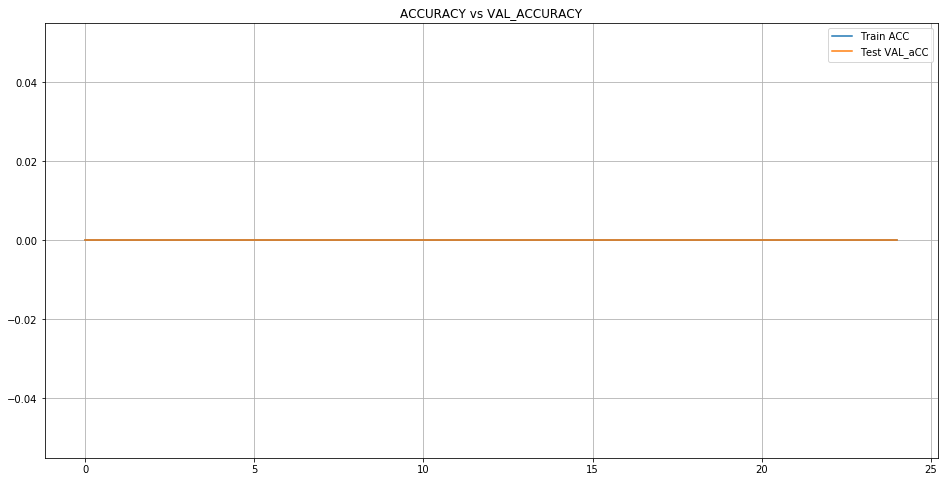

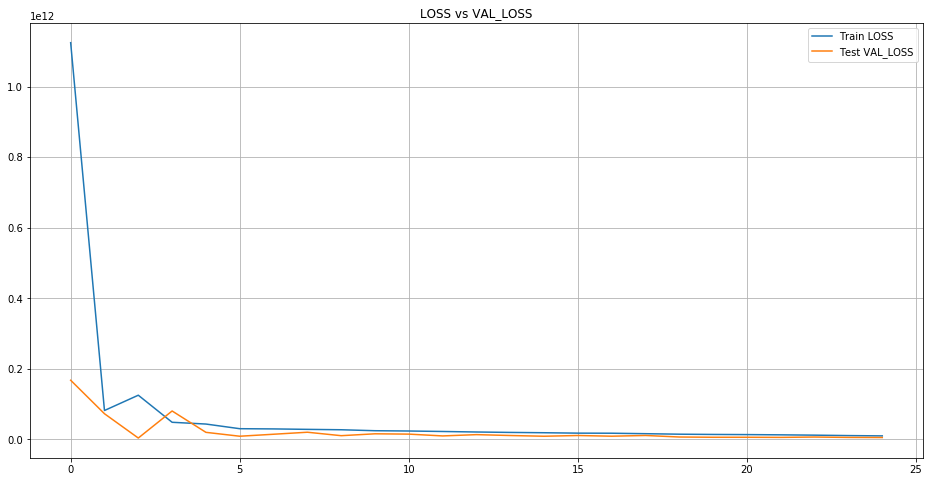



					Valores Input para Prediccion

 [array([[727., 920., 906.]]), array([[0.57, 0.78, 0.9 ]]), array([[6870841.555393, 6870841.555393, 6870841.555393]]), array([[2121575., 2025455., 2058386.]]), array([[21622937., 21622937., 21622937.]]), array([[ 96.13, 239.8 , 107.  ]]), array([[ 99.81, 100.09,  97.66]]), array([[1048793.76, 1171419.44, 1165254.24]]), array([[2025.45, 1785.66, 1950.57]]), array([[58.4 , 58.68, 58.49]]), array([[1380., 1230., 1193.]]), array([[742., 796., 865.]])]


					Valores Output - Prediccion

 [[121780.09]]


In [36]:
from numpy import array
from numpy import hstack
from keras.models import Model
from keras.layers import Input
from keras.layers import Dense, Dropout
from keras.layers.merge import concatenate
from pandas import DataFrame, concat, read_csv
""" 
Input:
    figx = Pixeles x
    figy= Pixeles y
    historyXYZ = history del modelo a graficar
    strEvaluacion= tipo de grafica, para definir titulo, subitutlos, etc
    mostrar= booleano para graficar o no
    nombreArchivo=archivo con el cual se guardara el grafico
Output:
    None, muestra la grafica en Matplotlib
Grafica los datos de history de un modelo, ya sea el accucary test vs train o el loss. 
"""
def graficaUnitaria(fix:16,fiy:8,historyXYZ,strEvaluacion,mostrar,nombreArchivo):
    figure(figsize=(fix,fiy))
    pyplot.grid(True)
    if(strEvaluacion=='accuracy'):
        pyplot.title("ACCURACY vs VAL_ACCURACY")
        pyplot.plot(historyXYZ.history['acc'], label='Train ACC')
        pyplot.legend()
        pyplot.plot(historyXYZ.history['val_acc'], label='Test VAL_aCC')
        pyplot.legend()
        pyplot.savefig(nombreArchivo, dpi=300)
        if(mostrar):
            pyplot.show()
    else:
        pyplot.title("LOSS vs VAL_LOSS")
        pyplot.plot(historyXYZ.history['loss'], label='Train LOSS')
        pyplot.plot(historyXYZ.history['val_loss'], label='Test VAL_LOSS')
        pyplot.legend()
        pyplot.savefig(nombreArchivo, dpi=300)
        if(mostrar):
            pyplot.show()
""" 
Input:
    [10,20,30,40,50...]
Output:
    [10 20 30] 40
    [20 30 40] 50
    [30 40 50] 60
    [40 50 60] 70
    [50 60 70] 80
    [60 70 80] 90
Divide una secuencia multivariada dada en varias muestras donde cada muestra 
tiene un número específico de pasos de tiempo y la salida es un solo paso de tiempo
"""
def split_sequences(sequences, n_steps):
    X, y = list(), list()
    for i in range(len(sequences)):
        end_ix = i + n_steps
        if end_ix > len(sequences):
            break
        seq_x, seq_y = sequences[i:end_ix, :-1], sequences[end_ix-1, -1]
        X.append(seq_x)
        y.append(seq_y)
    return array(X), array(y)
"""
Input: 
    listoflist=Lista de Listas  
    valoresPredecir=Lista vacia en la cual se guardara los valores
Output: 
    valoresPredecir=Lista con los valores almacenados
Pasa de un lista de listas a solo una lista
"""
def reemovNestings(valoresPredecir,listoflist): 
    for i in listoflist: 
        if type(i) == list: 
            reemovNestings(i) 
        else: 
            valoresPredecir.append(i) 
    return valoresPredecir

dataset1 = read_csv('aucorpTrain.csv', header=0, index_col=0)
dato1=dataset1.iloc[:,2]
values1 = dato1.values
val1=values1.tolist()
valores1 = [] 
listVal1=reemovNestings(valores1,val1) 

dato2=dataset1.iloc[:,3]
values2 = dato2.values
val2=values2.tolist()
valores2 = [] 
listVal2=reemovNestings(valores2,val2) 

dato3=dataset1.iloc[:,4]
values3 = dato3.values
val3=values3.tolist()
valores3 = [] 
listVal3=reemovNestings(valores3,val3) 

dato4=dataset1.iloc[:,5]
values4 = dato4.values
val4=values4.tolist()
valores4 = [] 
listVal4=reemovNestings(valores4,val4) 

dato5=dataset1.iloc[:,6]
values5 = dato5.values
val5=values5.tolist()
valores5 = [] 
listVal5=reemovNestings(valores5,val5) 

dato6=dataset1.iloc[:,7]
values6 = dato6.values
val6=values6.tolist()
valores6 = [] 
listVal6=reemovNestings(valores6,val6) 

dato7=dataset1.iloc[:,8]
values7 = dato7.values
val7=values7.tolist()
valores7 = [] 
listVal7=reemovNestings(valores7,val7) 

dato8=dataset1.iloc[:,9]
values8 = dato8.values
val8=values8.tolist()
valores8 = [] 
listVal8=reemovNestings(valores8,val8) 

dato9=dataset1.iloc[:,10]
values9 = dato9.values
val9=values9.tolist()
valores9 = [] 
listVal9=reemovNestings(valores9,val9) 

dato10=dataset1.iloc[:,11]
values10 = dato10.values
val10=values10.tolist()
valores10 = [] 
listVal10=reemovNestings(valores10,val10) 

dato11=dataset1.iloc[:,12]
values11 = dato11.values
val11=values11.tolist()
valores11 = [] 
listVal11=reemovNestings(valores11,val11) 

dato12=dataset1.iloc[:,13]
values12 = dato12.values
val12=values12.tolist()
valores12 = [] 
listVal12=reemovNestings(valores12,val12) 

datoSalida=dataset1.iloc[:,1]
valuesSalida = datoSalida.values
valSalida=valuesSalida.tolist()
valoresSalida = [] 
salida=reemovNestings(valoresSalida,valSalida) 

in_seq1 = array(listVal12)
in_seq2 = array(listVal2)
in_seq3 = array(listVal3)
in_seq4 = array(listVal4)
in_seq5 = array(listVal5)
in_seq6 = array(listVal6)
in_seq7 = array(listVal7)
in_seq8 = array(listVal8)
in_seq9 = array(listVal9)
in_seq10 = array(listVal10)
in_seq11 = array(listVal11)
in_seq12 = array(listVal12)
out_seq = array(salida)

in_seq1 = in_seq1.reshape((len(in_seq1), 1))
in_seq2 = in_seq2.reshape((len(in_seq2), 1))
in_seq3 = in_seq3.reshape((len(in_seq3), 1))
in_seq4 = in_seq4.reshape((len(in_seq4), 1))
in_seq5 = in_seq5.reshape((len(in_seq5), 1))
in_seq6 = in_seq6.reshape((len(in_seq6), 1))
in_seq7 = in_seq7.reshape((len(in_seq7), 1))
in_seq8 = in_seq8.reshape((len(in_seq8), 1))
in_seq9 = in_seq9.reshape((len(in_seq9), 1))
in_seq10 = in_seq10.reshape((len(in_seq10), 1))
in_seq11 = in_seq11.reshape((len(in_seq11), 1))
in_seq12 = in_seq12.reshape((len(in_seq12), 1))
out_seq = out_seq.reshape((len(out_seq), 1))

dataset = hstack((in_seq1, in_seq2,in_seq3,in_seq4,in_seq5, in_seq6,in_seq7,in_seq8,in_seq9, in_seq10,in_seq11,in_seq12, out_seq))
#print(dataset)
n_steps = 3
X, y = split_sequences(dataset, n_steps)
X1 = X[:, :, 0]
X2 = X[:, :, 1]
X3 = X[:, :, 2]
X4 = X[:, :, 3]
X5 = X[:, :, 4]
X6 = X[:, :, 5]
X7 = X[:, :, 6]
X8 = X[:, :, 7]
X9 = X[:, :, 8]
X10 = X[:, :, 9]
X11 = X[:, :, 10]
X12 = X[:, :, 11]

visible1 = Input(shape=(n_steps,))
dense1 = Dense(12, activation='relu')(visible1)

visible2 = Input(shape=(n_steps,))
dense2 = Dense(12, activation='relu')(visible2)

visible3 = Input(shape=(n_steps,))
dense3 = Dense(12, activation='relu')(visible3)

visible4 = Input(shape=(n_steps,))
dense4 = Dense(12, activation='relu')(visible4)

visible5 = Input(shape=(n_steps,))
dense5 = Dense(12, activation='relu')(visible5)

visible6 = Input(shape=(n_steps,))
dense6 = Dense(12, activation='relu')(visible6)

visible7 = Input(shape=(n_steps,))
dense7 = Dense(12, activation='relu')(visible7)

visible8 = Input(shape=(n_steps,))
dense8 = Dense(12, activation='relu')(visible8)

visible9 = Input(shape=(n_steps,))
dense9 = Dense(12, activation='relu')(visible9)

visible10 = Input(shape=(n_steps,))
dense10 = Dense(12, activation='relu')(visible10)

visible11 = Input(shape=(n_steps,))
dense11 = Dense(12, activation='relu')(visible11)

visible12 = Input(shape=(n_steps,))
dense12 = Dense(12, activation='relu')(visible12)

merge = concatenate([dense1, dense2,dense3, dense4,dense5, dense6,dense7, dense8,dense9, dense10,dense11, dense12])

output = Dense(1)(merge)
model = Model(inputs=[visible1, visible2,visible3, visible4,visible5, visible6,visible7, visible8,visible9, visible10,visible11, visible12], outputs=output)
model.compile(optimizer='adam', loss='mse', metrics=['accuracy'])
historyC1=model.fit([X1, X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12], y, epochs=2000, verbose=0,validation_split=0.33,nb_epoch=25, batch_size=5)
print('\n\n\t\t\t\t\tResultado de Modelo Entrenado\n\n')
model.summary()
model.save("modeloMultivariadoMLPI10012.h5")
print("Modelo Guardado Exitosamente")

%pylab inline
graficaUnitaria(16,8,historyC1,'accuracy',True,'modeloMultivariadoMLPI10012c1Acc.png')
graficaUnitaria(16,8,historyC1,'loss',True,'modeloMultivariadoMLPI10012c1Loss.png')


x_input = array([[727,0.57,6870841.555393,2121575,21622937,96.13,99.81,1048793.76,2025.45,58.40,1380,742],
  [920,0.78,6870841.555393,2025455,21622937,239.80,100.09,1171419.44,1785.66,58.68,1230,796],
  [906,0.90,6870841.555393,2058386,21622937,107.00,97.66,1165254.24,1950.57,58.49,1193,865]])
x1 = x_input[:, 0].reshape((1, n_steps))
x2 = x_input[:, 1].reshape((1, n_steps))
x3 = x_input[:, 2].reshape((1, n_steps))
x4 = x_input[:, 3].reshape((1, n_steps))
x5 = x_input[:, 4].reshape((1, n_steps))
x6 = x_input[:, 5].reshape((1, n_steps))
x7 = x_input[:, 6].reshape((1, n_steps))
x8 = x_input[:, 7].reshape((1, n_steps))
x9 = x_input[:, 8].reshape((1, n_steps))
x10 = x_input[:, 9].reshape((1, n_steps))
x11 = x_input[:, 10].reshape((1, n_steps))
x12 = x_input[:, 11].reshape((1, n_steps))

yPrediccion = model.predict([x1, x2,x3,x4, x5,x6, x7,x8, x9,x10,x11, x12], verbose=0)
print('\n\n\t\t\t\t\tValores Input para Prediccion\n\n',[x1, x2,x3,x4, x5,x6, x7,x8, x9,x10,x11, x12])
print('\n\n\t\t\t\t\tValores Output - Prediccion\n\n',yPrediccion)